In [159]:
import numpy as np 
import pandas as pd
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

import matplotlib.font_manager as font_manager
from matplotlib import rc
   
# 한글폰트작업
# window의 폰트 위치 -> C:/Windows/Fonts/NGULIM.TTF
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# from labeling_function import labeling

# <font color = 4247D6> Data Set

In [160]:
dataset = pd.read_csv("경진대회용 용해탱크 데이터셋.csv")
dataset

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [161]:
df = dataset.drop(['STD_DT', 'NUM'],axis=1)
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,OK
1,433,78,609,3.19,OK
2,464,154,608,3.19,OK
3,379,212,606,3.19,OK
4,798,1736,604,3.21,OK
...,...,...,...,...,...
835195,755,1743,318,3.21,OK
835196,385,206,317,3.19,OK
835197,465,148,316,3.20,OK
835198,467,0,314,3.19,OK


In [162]:
df.replace({'TAG': {'OK': 1, 'NG': 0}}, inplace=True)
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1
1,433,78,609,3.19,1
2,464,154,608,3.19,1
3,379,212,606,3.19,1
4,798,1736,604,3.21,1
...,...,...,...,...,...
835195,755,1743,318,3.21,1
835196,385,206,317,3.19,1
835197,465,148,316,3.20,1
835198,467,0,314,3.19,1


# <font color = 5904DB> 분석 예측

# <font color = E80C77> MOTORSPEED 제외

In [53]:
df_2 = df.drop('MOTORSPEED', axis=1)
df_2

,MELT_TEMP,MELT_WEIGHT,INSP,TAG
0,489,631,3.19,1
1,433,609,3.19,1
2,464,608,3.19,1
3,379,606,3.19,1
4,798,604,3.21,1
...,...,...,...,...
835195,755,318,3.21,1
835196,385,317,3.19,1
835197,465,316,3.20,1
835198,467,314,3.19,1


In [54]:
from sklearn.model_selection import train_test_split

X = df_2.drop('TAG',axis=1)  
Y = df_2[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\406220393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 예측 정확도: 0.78943


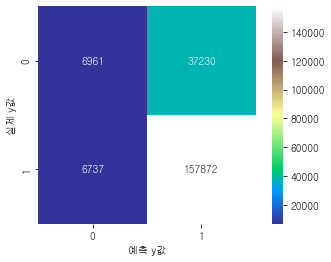

In [55]:
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=15, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

<AxesSubplot:>

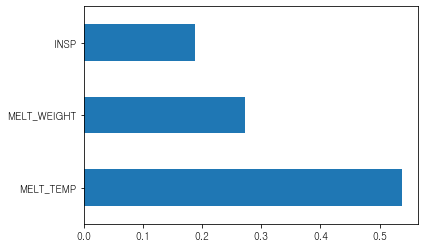

In [56]:
rfr = pd.Series(rf_clf.feature_importances_, index=X.columns)
rfr.nlargest(10).plot(kind='barh')
# plt.savefig('./rffeature.jpg', bbox_inches="tight")

# <font color = E80C77> INSP 제외

In [119]:
df_3 = df.drop('INSP', axis=1)
df_3

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
0,489,116,631,1
1,433,78,609,1
2,464,154,608,1
3,379,212,606,1
4,798,1736,604,1
...,...,...,...,...
835195,755,1743,318,1
835196,385,206,317,1
835197,465,148,316,1
835198,467,0,314,1


In [120]:
from sklearn.model_selection import train_test_split

X = df_3.drop('TAG',axis=1)  
Y = df_3[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\406220393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 예측 정확도: 0.79153


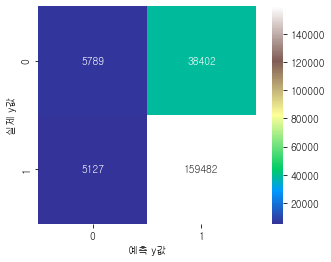

In [121]:
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=15, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [2]:
import math
import sklearn
import sklearn.preprocessing
import datetime
import tensorflow as tf

In [164]:
dataset_1 = dataset.copy()
dataset_1

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [165]:
dataset_1['STD_DT'] = pd.to_datetime(dataset_1['STD_DT'])
dataset_1

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 00:00:00,0,489,116,631,3.19,OK
1,2020-03-04 00:00:00,1,433,78,609,3.19,OK
2,2020-03-04 00:00:00,2,464,154,608,3.19,OK
3,2020-03-04 00:00:00,3,379,212,606,3.19,OK
4,2020-03-04 00:00:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59:00,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59:00,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59:00,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59:00,835198,467,0,314,3.19,OK


In [73]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD_DT       835200 non-null  datetime64[ns]
 1   NUM          835200 non-null  int64         
 2   MELT_TEMP    835200 non-null  int64         
 3   MOTORSPEED   835200 non-null  int64         
 4   MELT_WEIGHT  835200 non-null  int64         
 5   INSP         835200 non-null  float64       
 6   TAG          835200 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 44.6+ MB


In [136]:
dataset_1 = dataset_1.set_index(['STD_DT'])
dataset_1 = dataset_1.drop('NUM', axis=1)
dataset_1.replace({'TAG': {'OK': 1, 'NG': 0}}, inplace=True)
dataset_1

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,
2020-03-04 00:00:00,489,116,631,3.19,1
2020-03-04 00:00:00,433,78,609,3.19,1
2020-03-04 00:00:00,464,154,608,3.19,1
2020-03-04 00:00:00,379,212,606,3.19,1
2020-03-04 00:00:00,798,1736,604,3.21,1
...,...,...,...,...,...
2020-04-30 23:59:00,755,1743,318,3.21,1
2020-04-30 23:59:00,385,206,317,3.19,1
2020-04-30 23:59:00,465,148,316,3.20,1


In [155]:
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [166]:
dataset_1

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 00:00:00,0,489,116,631,3.19,OK
1,2020-03-04 00:00:00,1,433,78,609,3.19,OK
2,2020-03-04 00:00:00,2,464,154,608,3.19,OK
3,2020-03-04 00:00:00,3,379,212,606,3.19,OK
4,2020-03-04 00:00:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59:00,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59:00,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59:00,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59:00,835198,467,0,314,3.19,OK


In [167]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [168]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']

In [169]:
encoder = preprocessing.LabelEncoder()
dataset_1['TAG'] = encoder.fit_transform(df['TAG'])
dataset_1['TAG'] = dataset_1['TAG'].astype('float32')

In [170]:
dataset_2 = dataset_1[['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']]
dataset_2

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1.0
1,433,78,609,3.19,1.0
2,464,154,608,3.19,1.0
3,379,212,606,3.19,1.0
4,798,1736,604,3.21,1.0
...,...,...,...,...,...
835195,755,1743,318,3.21,1.0
835196,385,206,317,3.19,1.0
835197,465,148,316,3.20,1.0
835198,467,0,314,3.19,1.0


In [171]:
split_date = int(dataset_2.shape[0]*0.7)

In [172]:
train = dataset_2[:split_date]
test = dataset_2[split_date:]

In [173]:
print(train.shape)
print(test.shape)

(584640, 5)
(250560, 5)


In [174]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [175]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [176]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (584640, 4) (584640,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (821032, 4) (821032,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    410516
0.0    410516
dtype: int64


In [177]:
len(X_train_over)

821032

In [178]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [265]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,0.345420,0.064302,0.011420,0.333333
1,0.238550,0.043237,0.011022,0.333333
2,0.297710,0.085366,0.011004,0.333333
3,0.135496,0.117517,0.010968,0.333333
4,0.935115,0.962306,0.010932,0.666667
...,...,...,...,...
821027,0.187023,0.114745,0.005110,0.166667
821028,0.223282,0.122506,0.009400,0.166667
821029,0.083969,0.109756,0.001495,0.166667
821030,0.206107,0.120165,0.003398,0.166667


In [179]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [270]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG'])

In [271]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']
label_cols = ['TAG']

In [272]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((250550, 10, 4), (250550, 1))

In [273]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((574715, 10, 4), (246307, 10, 4))

In [274]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [272]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [273]:
model_path = path

In [274]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [275]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
57472/57472 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8049
Epoch 1: val_loss improved from inf to 0.34125, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 273s 5ms/step - loss: 0.3498 - accuracy: 0.8049 - val_loss: 0.3413 - val_accuracy: 0.8125
Epoch 2/200
57463/57472 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8115
Epoch 2: val_loss improved from 0.34125 to 0.33897, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 268s 5ms/step - loss: 0.3395 - accuracy: 0.8115 - val_loss: 0.3390 - val_accuracy: 0.8081
Epoch 3/200
57462/57472 [============================>.] - ETA: 0s - loss: 0.3376 - accuracy: 0.8129
Epoch 3: val_loss did not improve from 0.33897
57472/57472 [==============================] - 270s 5ms/step - loss: 0.3376 - accuracy: 0.8129 - val_loss: 0.3395 - val_accuracy: 

In [276]:
model.load_weights(filename)

pred = model.predict(test_feature)

7830/7830 [==============================] - 14s 2ms/step


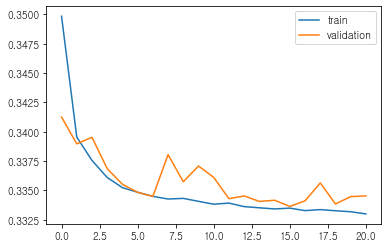

In [277]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [278]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [279]:
pred_df['TAG'].value_counts()

1    175636
0     74914
Name: TAG, dtype: int64

In [280]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[  2155    785]
 [ 72759 174851]]


In [281]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9955
recall : 0.7062
f1-score : 0.8262
accuracy : 0.7065


In [496]:
dataset_1

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,
2020-03-04 00:00:00,0.345420,0.064302,0.011420,0.333333,1.0
2020-03-04 00:00:00,0.238550,0.043237,0.011022,0.333333,1.0
2020-03-04 00:00:00,0.297710,0.085366,0.011004,0.333333,1.0
2020-03-04 00:00:00,0.135496,0.117517,0.010968,0.333333,1.0
2020-03-04 00:00:00,0.935115,0.962306,0.010932,0.666667,1.0
...,...,...,...,...,...
2020-04-30 23:59:00,0.853053,0.966186,0.005755,0.666667,1.0
2020-04-30 23:59:00,0.146947,0.114191,0.005737,0.333333,1.0
2020-04-30 23:59:00,0.299618,0.082040,0.005719,0.500000,1.0


In [489]:
dataset_3 = dataset_1.drop('INSP', axis=1)
dataset_3

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
STD_DT,,,,
2020-03-04 00:00:00,0.345420,0.064302,0.011420,1.0
2020-03-04 00:00:00,0.238550,0.043237,0.011022,1.0
2020-03-04 00:00:00,0.297710,0.085366,0.011004,1.0
2020-03-04 00:00:00,0.135496,0.117517,0.010968,1.0
2020-03-04 00:00:00,0.935115,0.962306,0.010932,1.0
...,...,...,...,...
2020-04-30 23:59:00,0.853053,0.966186,0.005755,1.0
2020-04-30 23:59:00,0.146947,0.114191,0.005737,1.0
2020-04-30 23:59:00,0.299618,0.082040,0.005719,1.0


In [338]:
split_date = int(dataset_3.shape[0]*0.7)

In [339]:
train = dataset_3[:split_date]
test = dataset_3[split_date:]

In [340]:
print(train.shape)
print(test.shape)

(584640, 4)
(250560, 4)


In [341]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [342]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [343]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (584640, 3) (584640,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (821032, 3) (821032,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    410516
0.0    410516
dtype: int64


In [344]:
len(X_train_over)

821032

In [345]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [346]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT
0,0.345420,0.064302,0.011420
1,0.238550,0.043237,0.011022
2,0.297710,0.085366,0.011004
3,0.135496,0.117517,0.010968
4,0.935115,0.962306,0.010932
...,...,...,...
821027,0.187023,0.114745,0.004312
821028,0.223282,0.122336,0.009563
821029,0.083969,0.109756,0.001495
821030,0.206107,0.120165,0.003398


In [347]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [348]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'TAG'])

In [349]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT']
label_cols = ['TAG']

In [350]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((250550, 10, 3), (250550, 1))

In [351]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((574715, 10, 3), (246307, 10, 3))

In [352]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [353]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [354]:
model_path = path

In [355]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [356]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
57470/57472 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.8045
Epoch 1: val_loss improved from inf to 0.34041, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 290s 5ms/step - loss: 0.3507 - accuracy: 0.8045 - val_loss: 0.3404 - val_accuracy: 0.8132
Epoch 2/200
57469/57472 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8113
Epoch 2: val_loss improved from 0.34041 to 0.33914, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 288s 5ms/step - loss: 0.3401 - accuracy: 0.8113 - val_loss: 0.3391 - val_accuracy: 0.8080
Epoch 3/200
57472/57472 [==============================] - ETA: 0s - loss: 0.3381 - accuracy: 0.8124
Epoch 3: val_loss improved from 0.33914 to 0.33758, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 287s 

In [357]:
model.load_weights(filename)

pred = model.predict(test_feature)

7830/7830 [==============================] - 16s 2ms/step


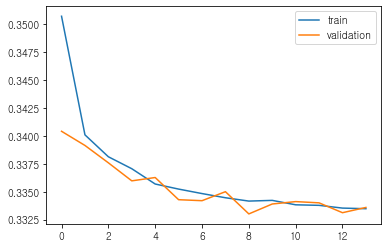

In [358]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [359]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [360]:
pred_df['TAG'].value_counts()

1    176328
0     74222
Name: TAG, dtype: int64

In [361]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[  2161    779]
 [ 72061 175549]]


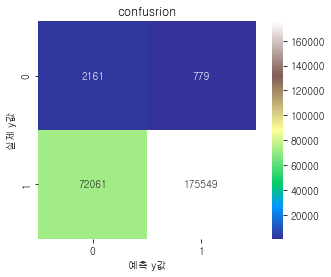

In [364]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [362]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9956
recall : 0.7090
f1-score : 0.8282
accuracy : 0.7093


# <font color = F21638> 딥러닝 F1

###  <font color = F21638> MELT_WEIGHT < 10000 이하인 데이터 셋

In [276]:
dataset.replace({'TAG': {'OK': 1, 'NG': 0}}, inplace=True)
dataset

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1
835198,2020-04-30 23:59,835198,467,0,314,3.19,1


In [277]:
dataset_3 = dataset[dataset['MELT_WEIGHT'] < 10000]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1
835198,2020-04-30 23:59,835198,467,0,314,3.19,1


In [278]:
dataset_3 = dataset_3[dataset_3['MELT_WEIGHT'] < 10000]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1
835198,2020-04-30 23:59,835198,467,0,314,3.19,1


### <font color = F21638> MOTORSPEED, MELT_WEIGHT == 0

In [279]:
dataset_3 = dataset_3[dataset_3['MOTORSPEED'] != 0]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835194,2020-04-30 23:59,835194,749,1740,319,3.21,1
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1


In [280]:
dataset_3 = dataset_3[dataset_3['MELT_WEIGHT'] != 0]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835194,2020-04-30 23:59,835194,749,1740,319,3.21,1
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1


### <font color = F21638> DL

In [281]:
dataset_3['STD_DT'] = dataset_3['STD_DT'].apply(lambda x: pd.to_datetime(str(x), format = '%Y-%m-%d %H:%M:%S'))

C:\Users\islab\AppData\Local\Temp\ipykernel_16868\1295738622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3['STD_DT'] = dataset_3['STD_DT'].apply(lambda x: pd.to_datetime(str(x), format = '%Y-%m-%d %H:%M:%S'))


In [282]:
dataset_3 = dataset_3.set_index(['STD_DT'])
dataset_3

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,1
2020-03-04 00:00:00,1,433,78,609,3.19,1
2020-03-04 00:00:00,2,464,154,608,3.19,1
2020-03-04 00:00:00,3,379,212,606,3.19,1
2020-03-04 00:00:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...
2020-04-30 23:59:00,835194,749,1740,319,3.21,1
2020-04-30 23:59:00,835195,755,1743,318,3.21,1
2020-04-30 23:59:00,835196,385,206,317,3.19,1


In [384]:
split_date = int(dataset_3.shape[0]*0.7)

In [385]:
train = dataset_3[:split_date]
test = dataset_3[split_date:]

In [386]:
print(train.shape)
print(test.shape)

(561647, 4)
(240706, 4)


In [387]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [388]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [389]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (561647, 3) (561647,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (800488, 3) (800488,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    400244
0.0    400244
dtype: int64


In [390]:
len(X_train_over)

800488

In [391]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [392]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT
0,0.345420,0.035429,0.063013
1,0.238550,0.013714,0.060812
2,0.297710,0.057143,0.060712
3,0.135496,0.090286,0.060512
4,0.935115,0.961143,0.060312
...,...,...,...
800483,0.209924,0.015831,0.065332
800484,0.137405,0.096267,0.029490
800485,0.150763,0.078768,0.028331
800486,0.154580,0.084453,0.062823


In [393]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [394]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'TAG'])

In [395]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT']
label_cols = ['TAG']

In [396]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((240696, 10, 3), (240696, 1))

In [397]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((560334, 10, 3), (240144, 10, 3))

In [465]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [466]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [467]:
model_path = path

In [398]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [399]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [400]:
model_path = path

In [401]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [402]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
56034/56034 [==============================] - ETA: 0s - loss: 0.3576 - accuracy: 0.8054
Epoch 1: val_loss improved from inf to 0.33983, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 314s 6ms/step - loss: 0.3576 - accuracy: 0.8054 - val_loss: 0.3398 - val_accuracy: 0.8103
Epoch 2/200
56027/56034 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.8107
Epoch 2: val_loss improved from 0.33983 to 0.33397, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 307s 5ms/step - loss: 0.3397 - accuracy: 0.8107 - val_loss: 0.3340 - val_accuracy: 0.8146
Epoch 3/200
56031/56034 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8137
Epoch 3: val_loss improved from 0.33397 to 0.33208, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 308s 

In [403]:
model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 18s 2ms/step


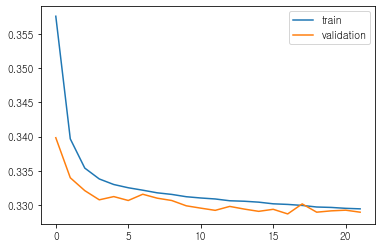

In [404]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [405]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [406]:
pred_df['TAG'].value_counts()

1    199015
0     41681
Name: TAG, dtype: int64

In [407]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[   272   2203]
 [ 41409 196812]]


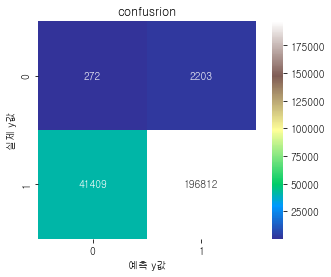

In [408]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [409]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9889
recall : 0.8262
f1-score : 0.9003
accuracy : 0.8188


# <font color = F21638> GRU

In [410]:
from keras.layers import GRU
model = Sequential()
model.add(GRU(20, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [411]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [412]:
model_path = path

In [423]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [424]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
56033/56034 [============================>.] - ETA: 0s - loss: 0.3558 - accuracy: 0.8059
Epoch 1: val_loss improved from inf to 0.34138, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 203s 4ms/step - loss: 0.3558 - accuracy: 0.8059 - val_loss: 0.3414 - val_accuracy: 0.8102
Epoch 2/200
56031/56034 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8096
Epoch 2: val_loss improved from 0.34138 to 0.33665, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 194s 3ms/step - loss: 0.3410 - accuracy: 0.8096 - val_loss: 0.3366 - val_accuracy: 0.8115
Epoch 3/200
56033/56034 [============================>.] - ETA: 0s - loss: 0.3386 - accuracy: 0.8103
Epoch 3: val_loss did not improve from 0.33665
56034/56034 [==============================] - 194s 3ms/step - loss: 0.3386 - accuracy: 0.8103 - val_loss: 0.3379 - val_accuracy: 

In [415]:
model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 14s 2ms/step


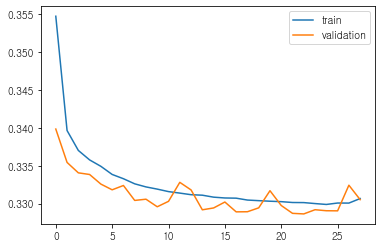

In [416]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [417]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [418]:
pred_df['TAG'].value_counts()

1    197997
0     42699
Name: TAG, dtype: int64

In [419]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[   269   2206]
 [ 42430 195791]]


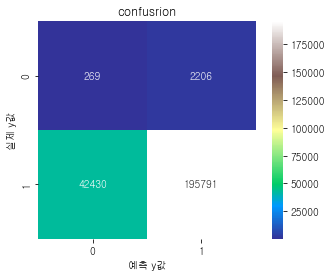

In [420]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [421]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9889
recall : 0.8219
f1-score : 0.8977
accuracy : 0.8146


# LSTM

In [502]:
dataset_3

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,1
2020-03-04 00:00:00,1,433,78,609,3.19,1
2020-03-04 00:00:00,2,464,154,608,3.19,1
2020-03-04 00:00:00,3,379,212,606,3.19,1
2020-03-04 00:00:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...
2020-04-30 23:59:00,835194,749,1740,319,3.21,1
2020-04-30 23:59:00,835195,755,1743,318,3.21,1
2020-04-30 23:59:00,835196,385,206,317,3.19,1


In [512]:
dataset_3 = dataset_3.drop(['NUM', 'INSP'], axis=1)
dataset_3

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
STD_DT,,,,
2020-03-04 00:00:00,489,116,631,1
2020-03-04 00:00:00,433,78,609,1
2020-03-04 00:00:00,464,154,608,1
2020-03-04 00:00:00,379,212,606,1
2020-03-04 00:00:00,798,1736,604,1
...,...,...,...,...
2020-04-30 23:59:00,749,1740,319,1
2020-04-30 23:59:00,755,1743,318,1
2020-04-30 23:59:00,385,206,317,1


In [513]:
split_date = int(dataset_3.shape[0]*0.7)

In [514]:
train = dataset_3[:split_date]
test = dataset_3[split_date:]

In [515]:
print(train.shape)
print(test.shape)

(561647, 4)
(240706, 4)


In [516]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [517]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [518]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (561647, 3) (561647,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (800488, 3) (800488,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    400244
0.0    400244
dtype: int64


In [519]:
len(X_train_over)

800488

In [520]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [521]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT
0,0.345420,0.035429,0.063013
1,0.238550,0.013714,0.060812
2,0.297710,0.057143,0.060712
3,0.135496,0.090286,0.060512
4,0.935115,0.961143,0.060312
...,...,...,...
800483,0.209924,0.015831,0.065332
800484,0.137405,0.096267,0.029490
800485,0.150763,0.078768,0.028331
800486,0.154580,0.084453,0.062823


In [522]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [523]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'TAG'])

In [524]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT']
label_cols = ['TAG']

In [525]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((240696, 10, 3), (240696, 1))

In [526]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((560334, 10, 3), (240144, 10, 3))

In [528]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [529]:
model_path = path

In [527]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [530]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [531]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 30, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3653 - accuracy: 0.8040
Epoch 1: val_loss improved from inf to 0.34720, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 191s 10ms/step - loss: 0.3653 - accuracy: 0.8040 - val_loss: 0.3472 - val_accuracy: 0.8099
Epoch 2/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3434 - accuracy: 0.8092
Epoch 2: val_loss improved from 0.34720 to 0.34005, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 178s 10ms/step - loss: 0.3434 - accuracy: 0.8092 - val_loss: 0.3401 - val_accuracy: 0.8107
Epoch 3/200
18674/18678 [============================>.] - ETA: 0s - loss: 0.3392 - accuracy: 0.8100
Epoch 3: val_loss improved from 0.34005 to 0.33956, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 162

In [532]:
# model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 31s 4ms/step


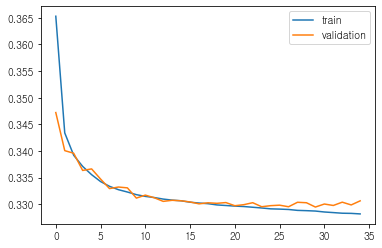

In [534]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [535]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [536]:
pred_df['TAG'].value_counts()

1    210583
0     30113
Name: TAG, dtype: int64

In [537]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[    98   2377]
 [ 30015 208206]]


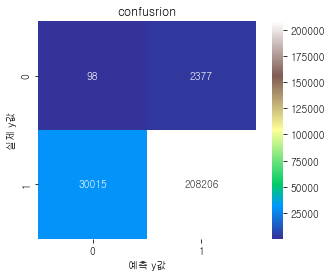

In [538]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [540]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 50)                10800     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [539]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9887
recall : 0.8740
f1-score : 0.9278
accuracy : 0.8654


## <font color = F21638> TCN

In [455]:
from tcn import TCN, tcn_full_summary
from keras.layers import Dropout
model = Sequential()
model.add(TCN(50, input_shape = (train_feature.shape[1], train_feature.shape[2]), return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [456]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [457]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 500,
                    validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
1121/1121 [==============================] - ETA: 0s - loss: 0.3526 - accuracy: 0.8055
Epoch 1: val_loss improved from inf to 0.34105, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
1121/1121 [==============================] - 1299s 1s/step - loss: 0.3526 - accuracy: 0.8055 - val_loss: 0.3411 - val_accuracy: 0.8014
Epoch 2/200
1121/1121 [==============================] - ETA: 0s - loss: 0.3383 - accuracy: 0.8108
Epoch 2: val_loss improved from 0.34105 to 0.33390, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
1121/1121 [==============================] - 1301s 1s/step - loss: 0.3383 - accuracy: 0.8108 - val_loss: 0.3339 - val_accuracy: 0.8124
Epoch 3/200
1121/1121 [==============================] - ETA: 0s - loss: 0.3361 - accuracy: 0.8123
Epoch 3: val_loss improved from 0.33390 to 0.33338, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
1121/1121 [==============================] - 1339s 1s/step - l

In [458]:
# model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 114s 15ms/step


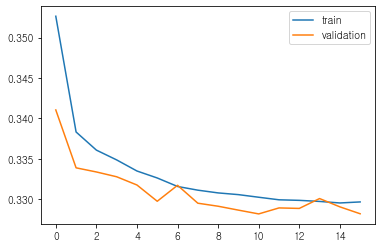

In [459]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [460]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [461]:
pred_df['TAG'].value_counts()

1    202462
0     38234
Name: TAG, dtype: int64

In [462]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[    87   2388]
 [ 38147 200074]]


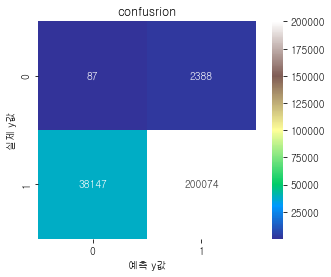

In [463]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [464]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9882
recall : 0.8399
f1-score : 0.9080
accuracy : 0.8316


# LSTM 

In [544]:
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [545]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [546]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 30,
                    validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8037
Epoch 1: val_loss improved from inf to 0.35417, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 788s 42ms/step - loss: 0.3646 - accuracy: 0.8037 - val_loss: 0.3542 - val_accuracy: 0.8096
Epoch 2/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8090
Epoch 2: val_loss improved from 0.35417 to 0.34036, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 731s 39ms/step - loss: 0.3482 - accuracy: 0.8090 - val_loss: 0.3404 - val_accuracy: 0.8096
Epoch 3/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3388 - accuracy: 0.8111
Epoch 3: val_loss improved from 0.34036 to 0.33657, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 750

In [547]:
# model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 65s 9ms/step


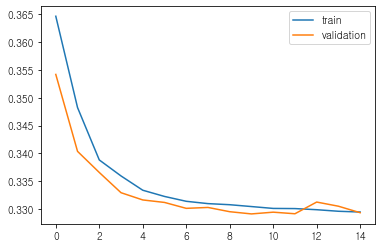

In [548]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [549]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [550]:
pred_df['TAG'].value_counts()

1    209346
0     31350
Name: TAG, dtype: int64

In [551]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[    49   2426]
 [ 31301 206920]]


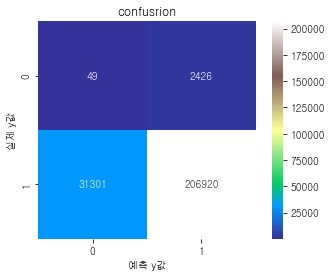

In [552]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [553]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9884
recall : 0.8686
f1-score : 0.9246
accuracy : 0.8599
